# Import modules and set paths

In [1]:
cd F:\UbuntuShare\sortProjects\171101\p1\glab

F:\UbuntuShare\sortProjects\171101\p1\glab


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import h5py as h5py
import glob as glob
import numpy as np
import scipy.io
import sys
import os
import klusta
from klusta.kwik import KwikModel
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

ModuleNotFoundError: No module named 'klusta'

In [335]:
currPath = os.getcwd()

# specify kwik file path and load model
#kwik_path = 'Z:/HarveyLab/Alan/Data/20170927/p1/p1.kwik'
#model = KwikModel(kwik_path)
# append kwik-tools path and import read_rhd
sys.path.append('C://Users/Alan/Documents/Github/clustering-pipelines')
import read_rhd as rhd

In [336]:
## import tool to read mda files; mlpy is available on the ms4 github branch (https://github.com/magland/mountainlab/tree/ms4)
sys.path.append('C:\\Users\\Alan\\Documents\\GitHub\\mountainlab\\packages\\mlpy\\mda')
import mdaio

# Extract clusters in good category, analyze, and plot

In [337]:
firings = mdaio.readmda(currPath+'\\firings.curated.mda')
sampleRate = 20000

In [338]:
gridIndent = scipy.io.matlab.loadmat(currPath+'\\'+glob.glob('GridIndent*.mat')[0])
gridPosActual = gridIndent['grid_positions_actual']
gridPosActual = np.transpose(gridPosActual)

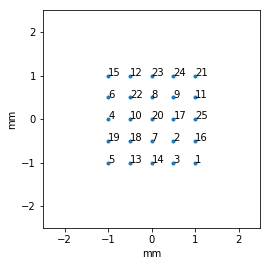

In [339]:
plt.plot(gridPosActual[0][0]*-1+9,gridPosActual[0][1]*-1+9,'.')

for i,pos in enumerate(np.transpose(gridPosActual[0])):
    #print(pos)
    plt.annotate(str(i+1),(pos[0]-9,pos[1]-9))

plt.ylabel('mm')
plt.xlabel('mm')
plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])
plt.axes().set_aspect('equal')

In [340]:
goodsamples = firings[1][:]
goodspikes = firings[2][:]
goodtimes = goodsamples/sampleRate

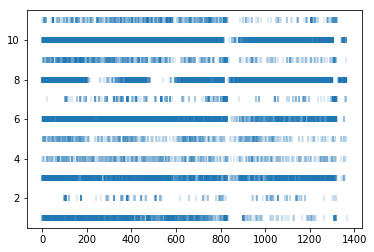

In [341]:
plt.plot(goodtimes, goodspikes,"|",mew=0.3)

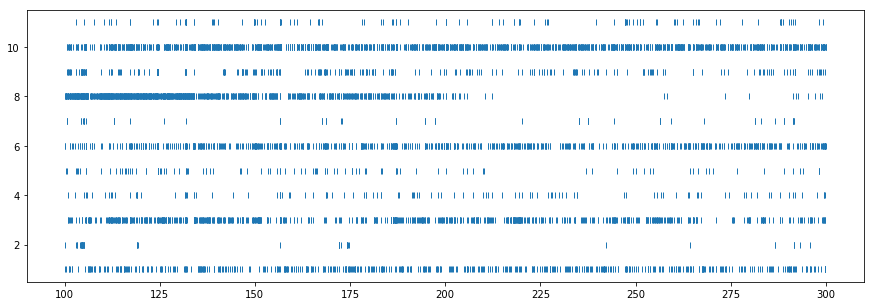

In [350]:
ltime = 100 # in seconds
rtime = 300 # in seconds

#plt.plot(goodtimes,goodspikes,'|')
plt.figure(figsize=(15,5))
plt.plot(goodtimes[(goodtimes > ltime) & (goodtimes < rtime)],goodspikes[(goodtimes > ltime) & (goodtimes < rtime)],'|')

In [22]:
import load_intan_input_channels as liic

In [23]:
## if modifying liic, use this to reload instead of restarting kernel

import importlib
importlib.reload(liic)

<module 'load_intan_input_channels' from 'C://Users/Alan/Documents/Github/clustering-pipelines\\load_intan_input_channels.py'>

In [24]:
[di,ai] = liic.load_intan_input_channels('*')

gridIndent_171016_171845chan0.di
gridIndent_171016_171910chan0.di
gridIndent_171016_171935chan0.di
gridIndent_171016_172000chan0.di
gridIndent_171016_172025chan0.di
gridIndent_171016_172050chan0.di
gridIndent_171016_172115chan0.di
gridIndent_171016_172140chan0.di
gridIndent_171016_172205chan0.di
gridIndent_171016_172230chan0.di
gridIndent_171016_172255chan0.di
gridIndent_171016_172320chan0.di
gridIndent_171016_172345chan0.di
gridIndent_171016_172410chan0.di
gridIndent_171016_172435chan0.di
gridIndent_171016_172501chan0.di
gridIndent_171016_172526chan0.di
gridIndent_171016_172551chan0.di
gridIndent_171016_172616chan0.di
gridIndent_171016_172641chan0.di
gridIndent_171016_172706chan0.di
gridIndent_171016_172731chan0.di
gridIndent_171016_172756chan0.di
gridIndent_171016_172821chan0.di
gridIndent_171016_172846chan0.di
gridIndent_171016_172911chan0.di
gridIndent_171016_172936chan0.di
gridIndent_171016_173001chan0.di
gridIndent_171016_173026chan0.di
gridIndent_171016_173051chan0.di
gridIndent

124
[20417]


KeyError: '2'

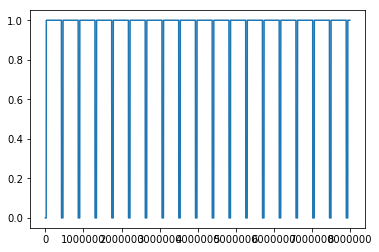

In [343]:
# load traces from intan, break out into variables, and find trigger times

intan_trigger = di['0'][:]

intan_transitions =  np.where(intan_trigger[:-1] != intan_trigger[1:])[0]

adj1 = (intan_transitions[0])
#adj2 = int(intan_transitions[2] - intan_transitions[0] - 10800000/3)
#adj3 = int(intan_transitions[4] - intan_transitions[2] - 10800000/3)

print(len(intan_transitions))

adjlist = [adj1] #, adj2, adj3]
print(adjlist)
plt.plot(intan_trigger[:int(8e6)])


intan_led = di['2'][:]

In [ ]:
#load traces from nidaq and break out into variables

matlab_trigger = []
matlab_triggerCMD = []
#matlab_led = []

matlab_length = []
matlab_force = []

matlabFiles = glob.glob('Indenter*.mat')
matlabFiles.sort(key=os.path.getmtime)

for file in matlabFiles:
    print(file)
    a = scipy.io.matlab.loadmat(file)
    matlab_trigger.append(a['data'][:,0])
    matlab_triggerCMD.append(a['trigger'][:,0])
    print(a['data'].shape)
    if a['data'].shape[1] == 3: # for portions of the experiment where length and force data were not recorded, add 0s to the trace
        matlab_length.append(a['data'][:,1])
        matlab_force.append(a['data'][:,2])
    else:
        matlab_length.append(np.zeros(a['data'].shape[0]))
        matlab_force.append(np.zeros(a['data'].shape[0]))
    

matlab_length = np.concatenate(matlab_length)
matlab_force = np.concatenate(matlab_force)
matlab_trigger = np.concatenate(matlab_trigger)
matlab_triggerCMD = np.concatenate(matlab_triggerCMD)

matlab_trigger[matlab_trigger < 1.5] = 0
matlab_trigger[matlab_trigger > 1.5] = 1



In [34]:
## Divy into sweeps
intan_starts = np.where(intan_trigger[:-1] < intan_trigger[1:])[0]
intan_ends = np.where(intan_trigger[:-1] > intan_trigger[1:])[0]
matlab_starts = np.where(matlab_trigger[:-1] < matlab_trigger[1:])[0]
matlab_ends = np.where(matlab_trigger[:-1] > matlab_trigger[1:])[0]

if len(matlab_starts) != len(intan_starts):
        matlab_starts = matlab_starts[:len(intan_starts)]
        matlab_ends = matlab_ends[:len(intan_ends)]
        
matlab_length_sweeps = []
matlab_force_sweeps = []
#intan_led_sweeps = []

goodsamples_sweeps = []
goodspikes_sweeps = []

for sweepNum in range(len(matlab_starts)):
        intanStart = intan_starts[sweepNum]
        intanEnd = intan_ends[sweepNum]
        
        matlabStart = matlab_starts[sweepNum]
        matlabEnd = matlab_ends[sweepNum]
        
               
        matlabSweepLength = matlabEnd - matlabStart
        intanSweepLength = intanEnd - intanStart
        
        if matlabSweepLength != intanSweepLength:
            print('Sample lengths for sweep '+str(sweepNum)+' are not equivalent across devices.')
            #print(matlabSweepLength,intanSweepLength)
            buffer = matlabSweepLength - intanSweepLength
            intanEnd = intanEnd + buffer
            print('Added buffer of '+str(buffer)+' sample(s) to Intan signal.')
        
        matlab_length_sweeps.append(matlab_length[matlabStart:matlabEnd])
        matlab_force_sweeps.append(matlab_force[matlabStart:matlabEnd])
        #intan_led_sweeps.append(intan_led[intanStart:intanEnd])
        
        goodsamples_sweeps.append(goodsamples[(goodsamples > intanStart) & (goodsamples < intanEnd)]-intanStart)
        goodspikes_sweeps.append(goodspikes[(goodsamples > intanStart) & (goodsamples < intanEnd)])

Sample lengths for sweep 1 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 9 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 11 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 19 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 30 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 33 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 39 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 41 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sweep 45 are not equivalent across devices.
Added buffer of -1 sample(s) to Intan signal.
Sample lengths for sw

In [344]:
# baseline subtract sweeps (using end of sweep since length is increasing at the beginning)
for i, sweep in enumerate(matlab_force_sweeps):
    matlab_force_sweeps[i] -= np.mean(sweep[380000:])

In [351]:
def extractSpikesInWindow(windowOnset, windowDur, goodsamples_sweeps, goodspikes_sweeps, sampleRate=20000):
    """
    Inputs:
    windowOnset = time of windowOnset in sweep in s
    windoDur = duration of window in s
    goodsamples_sweeps = list of samples at which spikes are detected for each sweep
    goodspikes_sweeps = list of spike IDs corresponding to samples in goodsamples_sweeps
    sampleRate = sample rate in Hz, defaults to 20000
    
    Returns:
    list of spikes in that window
    
    """
    stepOnsetinSamples = windowOnset*sampleRate # in samples
    windowDurinSamples =  windowDur*sampleRate # in samples
    
    spikes = []
    for spikeSample, spike in zip(goodsamples_sweeps,goodspikes_sweeps):
        spikes.append((spikeSample[(spikeSample > stepOnsetinSamples) & (spikeSample < stepOnsetinSamples + windowDurinSamples)],
                         spike[(spikeSample > stepOnsetinSamples) &  (spikeSample < stepOnsetinSamples + windowDurinSamples)]))

        #plt.plot(spikeSample[(spikeSample > stepOnsetinSamples) & (spikeSample < stepOnsetinSamples + windowDurinSamples)],
        #         spike[(spikeSample > stepOnsetinSamples) & (spikeSample < stepOnsetinSamples + windowDurinSamples)],'|')
    return spikes

In [352]:
def generatePositionResponses(gridPosActual, spikes, numRepeats=3, numSteps = 1, unit=None):
    gridPosActualAll = np.transpose(gridPosActual)
    gridPosActualAll = np.matlib.repmat(gridPosActualAll,numRepeats,1)

    positionIndex = np.arange(len(np.transpose(gridPosActual)))
    positionIndex = np.matlib.repmat(positionIndex,numSteps,numRepeats)
    
    if numSteps > 1:
        positionIndex = np.transpose(positionIndex)
        positionIndex = positionIndex.reshape(positionIndex.shape[0]*positionIndex.shape[1])
    
            
    positionResponse = {}

    if unit:
        print('Extracting position responses for unit {0}'.format(unit))
        for sweep, index in zip(spikes,positionIndex):
            positionResponse[index] = positionResponse.get(index,0) + len(sweep[1][sweep[1]==unit])
    else:
        print('Extracting position responses for all units')
        for sweep, index in zip(spikes, positionIndex):
            #print('\n position {0}'.format(index))
            #print('newspikes:',len(sweep[1]))
            #print('oldspikes:',positionResponse.get(index,0))
            positionResponse[index] = positionResponse.get(index,0) + len(sweep[1]) #[sweep[1]==unit])
                
    positionResponses = []
    for index in positionResponse.keys():
        positionResponses.append([index, positionResponse[index]])

    return positionResponses

In [361]:
def plotPositionResponses(positionResponses, gridPosActual, maxSpikes=None, force=0, save=False):
    """
    plotting function for spatial receptive fields
    
    inputs
    positionResponses (from generatePositionResponses)
    force in mN for titling and savename of graph
    
    output: plot
    """
    plt.figure()
    plt.scatter(gridPosActual[0]*-1+9,gridPosActual[1]*-1+9,c=np.transpose(positionResponses)[1], s=300, cmap='viridis', vmin=0,vmax=maxSpikes)
    plt.axes().set_aspect('equal')
    plt.xlabel('mm')
    plt.ylabel('mm')
    plt.title('{0} mN'.format(force))
    cb = plt.colorbar()
    cb.set_label('spikes')
    plt.tight_layout()
    if save: plt.savefig('positionResponse{0}mN.png'.format(force),transparent=True)

Extracting position responses for all units


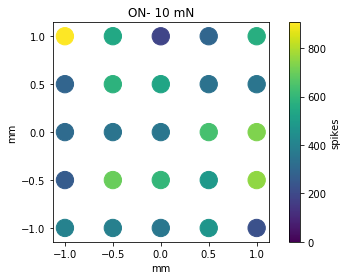

In [362]:
ONspikes10mN = extractSpikesInWindow(0.25, 0.35, goodsamples_steps, goodspikes_steps)
positionResponses10mN = generatePositionResponses(gridPosActual[0], ONspikes10mN, numSteps=18, numRepeats=3)
plotPositionResponses(positionResponses10mN,gridPosActual[0],force='ON- 10',save=False)

Extracting position responses for all units


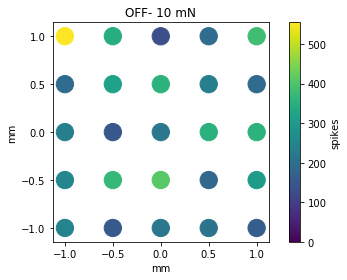

In [356]:
OFFspikes10mN = extractSpikesInWindow(0.75, 0.85, goodsamples_steps, goodspikes_steps)
OFFpositionResponses10mN = generatePositionResponses(gridPosActual[0], OFFspikes10mN, numSteps=18, numRepeats=3)
plotPositionResponses(OFFpositionResponses10mN,gridPosActual[0],force='OFF- 10',save=False)

Extracting position responses for unit 1
Extracting position responses for unit 2
Extracting position responses for unit 3
Extracting position responses for unit 4
Extracting position responses for unit 5
Extracting position responses for unit 6
Extracting position responses for unit 7
Extracting position responses for unit 8
Extracting position responses for unit 9
Extracting position responses for unit 10
Extracting position responses for unit 11


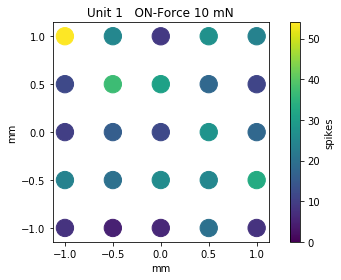

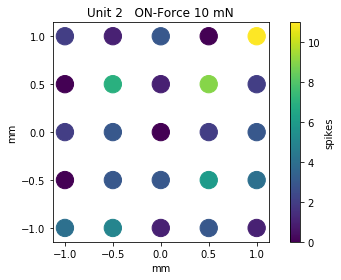

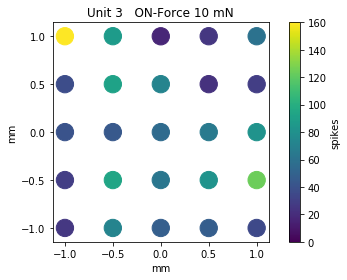

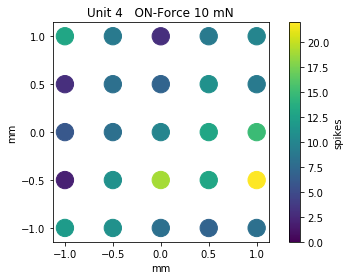

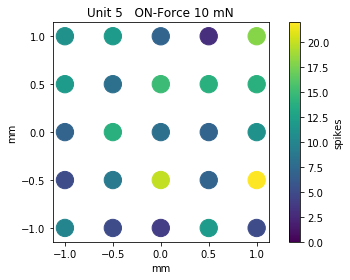

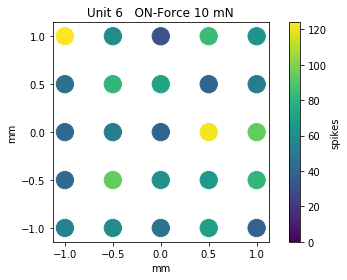

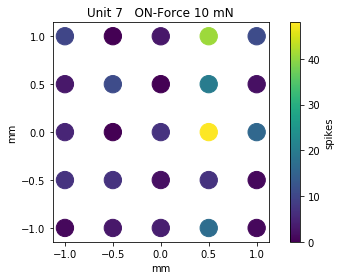

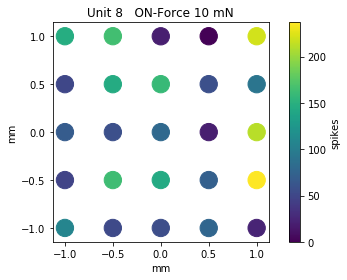

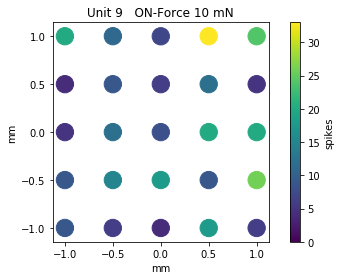

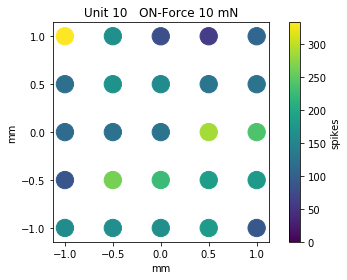

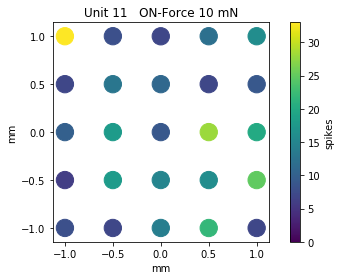

In [363]:
positionResponses10mNdict = {}
for unit in range(1,int(max(goodspikes)+1)):
    positionResponses10mNdict[unit] = generatePositionResponses(gridPosActual[0], ONspikes10mN, numRepeats=3, numSteps=18, unit=unit)
for unit in positionResponses10mNdict.keys():
    plotPositionResponses(positionResponses10mNdict[unit],gridPosActual[0],force='Unit '+str(unit)+'   ON-Force 10',save=False)

In [27]:
from mpl_toolkits.mplot3d import Axes3D

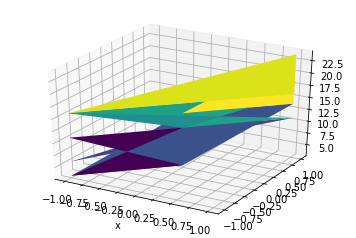

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
X = gridPosActual[0]*-1+9
Y = gridPosActual[1]*-1+9
Z = np.transpose(positionResponses5mN)[1]


#X, Y = np.meshgrid(X, Y)




ax.plot_surface(X,Y,Z, cmap='viridis')
ax.set_xlabel('x')

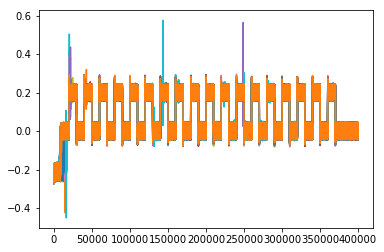

In [65]:
matlab_force_sweeps_binarized = []
for i, sweep in enumerate(matlab_force_sweeps):
    plt.plot(sweep)
    mean = np.mean(sweep)
    tempSweep = np.array(sweep[:])
    for i, point in enumerate(sweep):
            if point < mean:
                tempSweep[i] = 0
            else:
                tempSweep[i] = 1
    matlab_force_sweeps_binarized.append(tempSweep)
del tempSweep
del mean

In [80]:
## this doesn't work because of oscillations in the binarized signal at the beginning and end of steps

stepStarts = np.where(matlab_force_sweeps_binarized[0][:-1] < matlab_force_sweeps_binarized[0][1:])[0] # in samples
stepEnds = np.where(matlab_force_sweeps_binarized[0][:-1] > matlab_force_sweeps_binarized[0][1:])[0] # in samples

In [270]:
## Extracting windows with steps
# binarized force_sweeps to account for noise in signal and use those as samples for sweepstarts and ends
stepStarts = np.arange(20000,380000,20000) # in samples
stepEnds = np.arange(30000,390000,20000) # in samples
#sample_rate = sampleRate # just reminding myself that I defined this earlier
stepStarts = stepStarts - .25*sampleRate # adjusting to get a baseline; .25 is in s
stepEnds = stepEnds + .25*sampleRate # adjusting to get a post-step period


#initializing new lists
goodsamples_steps = []
goodspikes_steps = []
matlab_force_steps = []

for sweepSamples, sweepSpikes, sweepForce in zip(goodsamples_sweeps,goodspikes_sweeps,matlab_force_sweeps):
    for step in zip(stepStarts, stepEnds):
        goodsamples_steps.append(sweepSamples[(sweepSamples > step[0]) & (sweepSamples < step[1])] - step[0])
        goodspikes_steps.append(sweepSpikes[(sweepSamples > step[0]) & (sweepSamples < step[1])])
        matlab_force_steps.append(sweepForce[int(step[0]):int(step[1])])

#Subtract baseline

#for i,forceStep in enumerate(matlab_force_steps):
#    tempMean = np.mean(forceStep[0:10000])
#    matlab_force_steps[i] = forceStep - tempMean
        


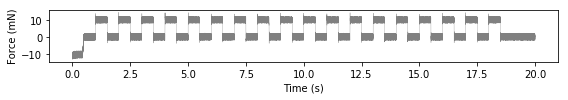

In [332]:
## Plotting Force trace for illustration of the protocol.

plt.figure(figsize=(8,1.5))
plt.plot(np.arange(0,399998/20000,1/20000),matlab_force_sweeps[61]*50,linewidth=0.3,color=[.5,.5,.5])
plt.xlabel('Time (s)')
plt.ylabel('Force (mN)')
plt.tight_layout()
plt.savefig('forceTrace.png')

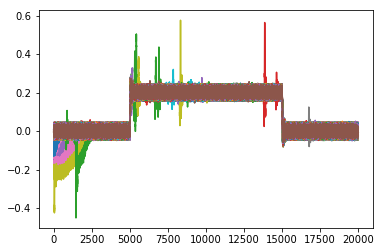

In [271]:
for step in matlab_force_steps:
    
    #step = step[:56000]
    plt.plot(step)

In [364]:
def plotForceRasters(force, samples, spikes, unit, save=False, baseline=0):
    # Plot force record
    forceScale = 50 # mN/V
    sample_rate = sampleRate
    f, (a0, a1) = plt.subplots(2,1,gridspec_kw={'height_ratios':[1,4]},figsize=(4,4))
    xaxis = np.arange(ltime-baseline,rtime-baseline,1/sample_rate)
    for i, sweep in enumerate(force[:10]):
        a0.plot(xaxis,sweep[int(sample_rate*ltime):int(sample_rate*rtime)]*forceScale,linewidth=.5,color='gray') # add +5*i to the y axis to get separate traces
    #a0.set_xlim(-.8,1.8)
    topxlim = a0.get_xlim()
    a0.set_title('Unit '+str(unit))
    #a0.set_yticks([])
    a0.set_xticks([])
    a0.set_ylim([-10, 25])
    a0.set_ylabel('Force (mN)')
    #plt.figure(figsize=(15,3))
    #for i, sweep in enumerate(matlab_length_sweeps):
    #    plt.plot(np.arange(ltime,(rtime),1/sample_rate),sweep[int(sample_rate*ltime):int(sample_rate*rtime)]+7*i,linewidth=.5)
    #plt.xlim(topxlim)

    # Plot Rasters
    for sweep in range(len(samples)):
        sweepspikes = spikes[sweep][spikes[sweep]==unit]
        sweepsamples = samples[sweep][spikes[sweep]==unit]
        sweepspikes = sweepspikes[(sweepsamples > ltime*sample_rate) & (sweepsamples < rtime*sample_rate)]
        sweepsamples = sweepsamples[(sweepsamples > ltime*sample_rate) & (sweepsamples < rtime*sample_rate)]
        a1.plot(sweepsamples/sample_rate-baseline,(sweepspikes+sweep-unit),'|',color='gray',markersize=2,mew=.5)
    a1.set_xlim(topxlim)
    a1.set_xlabel('Time (s)')
    a1.set_ylabel('Step #')
    plt.tight_layout()
    
    if save:
        plt.savefig('unit'+str(unit)+'step.png',transparent=True)


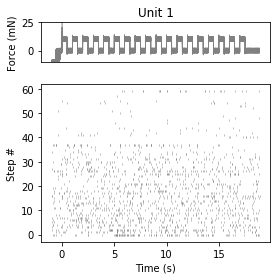

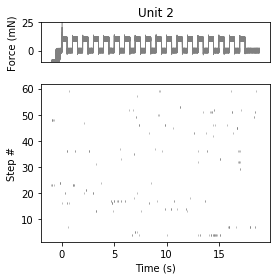

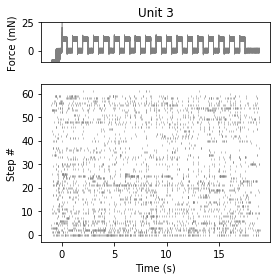

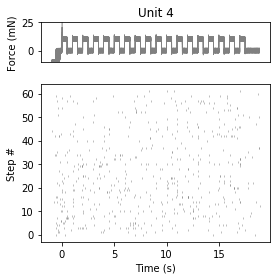

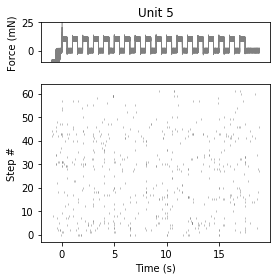

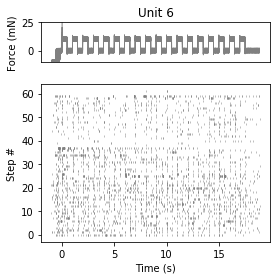

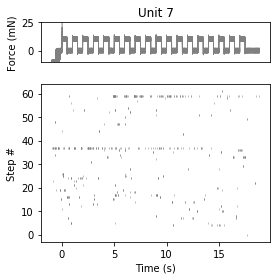

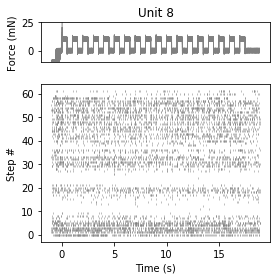

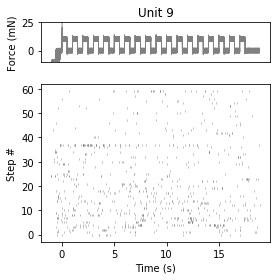

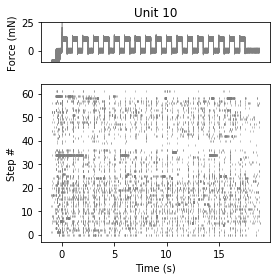

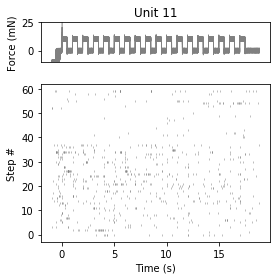

In [365]:
ltime = 0
rtime = 19.9
for unit in range(1,int(max(goodspikes)+1)):
    plotForceRasters(matlab_force_sweeps,goodsamples_sweeps,goodspikes_sweeps,unit,baseline=1,save=False)

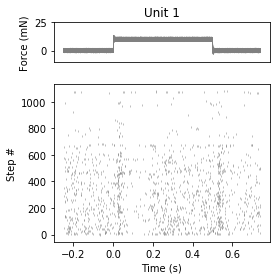

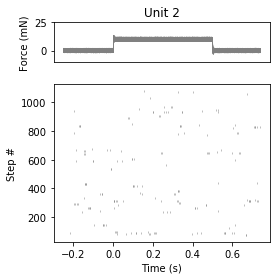

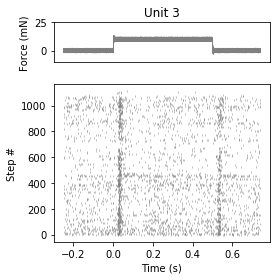

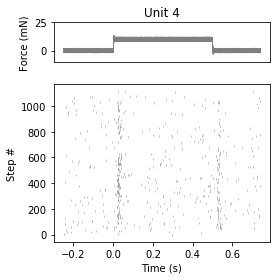

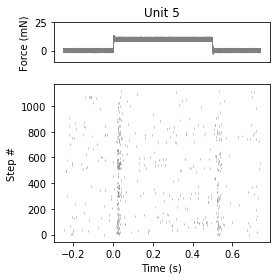

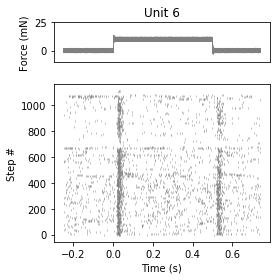

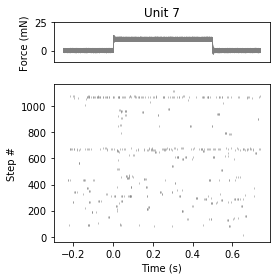

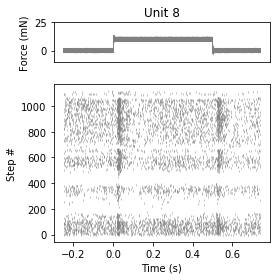

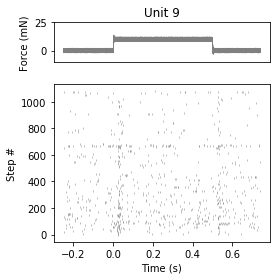

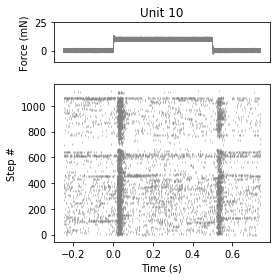

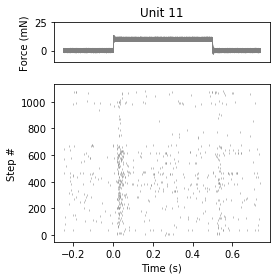

In [308]:
ltime = 0
rtime = .99
for unit in range(1,int(max(goodspikes)+1)):
    plotForceRasters(matlab_force_steps,goodsamples_steps,goodspikes_steps,unit,baseline=0.25,save=True)

In [111]:
def plotForcePSTHs(force, samples, spikes, unit, binSize=0.1, save=False):
    # Plot force record
    sample_rate = model.sample_rate
    f, (a0, a1) = plt.subplots(2,1,gridspec_kw={'height_ratios':[1,4]},figsize=(2,3.5))
    xaxis = np.arange(ltime,rtime,1/sample_rate)
    for i, sweep in enumerate(force):
        a0.plot(xaxis,sweep[int(sample_rate*ltime):int(sample_rate*rtime)],linewidth=.5,color='gray') # add +5*i to the y axis to get separate traces
    topxlim = a0.get_xlim()
    a0.set_title('Unit '+str(unit))
    #a0.set_yticks([])
    a0.set_xticks([])
    a0.set_ylim([-.1, 2.5])
    a0.set_ylabel('Force (V)')
    #plt.figure(figsize=(15,3))
    #for i, sweep in enumerate(matlab_length_sweeps):
    #    plt.plot(np.arange(ltime,(rtime),1/sample_rate),sweep[int(sample_rate*ltime):int(sample_rate*rtime)]+7*i,linewidth=.5)
    #plt.xlim(topxlim)
    
    for sweep in range(len(samples)):
            sweepspikes = spikes[sweep][spikes[sweep]==unit]
            sweepsamples = samples[sweep]

In [129]:
def make_sweep_psth(bin_size, samples, spikes,sample_rate=20000):
    # Use this to convert spike time rasters into PSTHs with user-defined bin
    # The samples and spikes inputs should be lists of numpy arrays containing spikes and spike times for each sweep
    
    # Output is organized in time x unit array
    
    bin_samples = bin_size * sample_rate
    
    maxBin = max(np.concatenate(samples))/sample_rate
    numUnits = max(np.concatenate(spikes))+1
    
    psths = np.zeros([int(np.floor(maxBin/bin_size))+1, numUnits])
    print('psth size is',psths.shape)
    psth_dict = {}
    for i in range(len(samples)):
        for stepSample, stepSpike in zip(samples[i], spikes[i]):
            psths[int(np.floor(stepSample/bin_samples)), stepSpike] += 1
    psth_dict['psths'] = psths/bin_size/len(samples) #in units of Hz
    psth_dict['bin_size'] = bin_size #in s
    psth_dict['sample_rate'] = sample_rate # in Hz
    psth_dict['xaxis'] = np.arange(0,maxBin,bin_size)
    return psth_dict

In [142]:
psth_dict = make_sweep_psth(0.005,goodsamples_steps,goodspikes_steps)

C:\Users\Alan\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


psth size is (200, 12)


C:\Users\Alan\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [140]:
for i, psth in enumerate(np.transpose(psth_dict['psths'])):
    psth_dict['psths'][:,i] =  psth/max(psth)

C:\Users\Alan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


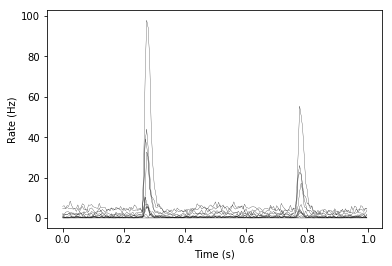

In [143]:
plt.plot(psth_dict['xaxis'],psth_dict['psths'],color='k',linewidth=.25)
plt.ylabel('Rate (Hz)')
plt.xlabel('Time (s)')

In [144]:
psths_bs = np.copy(np.transpose(psth_dict['psths']))

In [366]:
for i,psth in enumerate(psths_bs):
    tempMean = np.mean(psth[:int(.2/.005)])
    #print(tempMean)
    psths_bs[i] = psth - tempMean

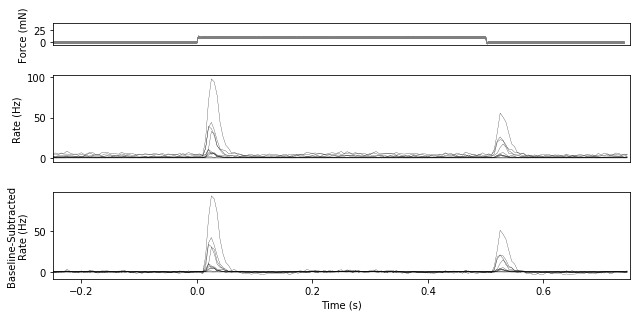

In [367]:
ltime = 0
rtime = .99
baseline = 0.25


# Plot force record
sample_rate = sampleRate
f, (a0, a1, a2) = plt.subplots(3,1,gridspec_kw={'height_ratios':[1,4,4]},figsize=(9,4.5))
xaxis = np.arange(ltime-baseline,rtime-baseline,1/sample_rate)
for i, sweep in enumerate(matlab_force_steps[:10]):
    a0.plot(xaxis,sweep[int(sample_rate*ltime):int(sample_rate*rtime)]*50,linewidth=.5,color='gray') # add +5*i to the y axis to get separate traces
a0.set_xlim(-.25,0.75)
a0.set_xticks([])
a0.set_ylim([-5, 40])
a0.set_ylabel('Force (mN)')

a1.plot(psth_dict['xaxis']-baseline,psth_dict['psths'],color='k',linewidth=.25)
a1.set_ylabel('Rate (Hz)')
a1.set_xticks([])
a1.set_xlim(-.25,.75)
#a1.set_ylim(0,120)

a2.plot(psth_dict['xaxis']-baseline,np.transpose(psths_bs),color='k',linewidth=.25)
a2.set_ylabel('Baseline-Subtracted\nRate (Hz)')
a2.set_xlabel('Time (s)')
a2.set_xlim(-.25,.75)
#a2.set_ylim(-15,90)

plt.tight_layout()
#plt.savefig('psths_bs_all.pdf',transparent=True)

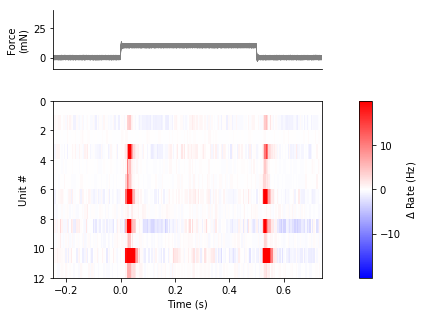

In [348]:
# Set parameters
ltime = 0
rtime = .99
baseline = 0.25


# Plot force record
sample_rate = sampleRate
f, axes = plt.subplots(2,2,gridspec_kw={'height_ratios':[1,3],'width_ratios':[20,1]},figsize=(6,4.5))
xaxis = np.arange(ltime-baseline,rtime-baseline,1/sample_rate)

for i, sweep in enumerate(matlab_force_steps[:10]):
    axes[0, 0].plot(xaxis,sweep[int(sample_rate*ltime):int(sample_rate*rtime)]*50,linewidth=.5,color='gray') 
axes[0, 0].set_xlim([ltime-baseline,rtime-baseline])
axes[0, 0].set_xticks([])
axes[0, 0].set_ylim([-10, 40])
axes[0, 0].set_ylabel('Force\n(mN)')
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

a1plot = axes[1,0].imshow(psths_bs[:,int(np.where(psth_dict['xaxis'] == ltime)[0]):int(np.where(psth_dict['xaxis'] == rtime)[0])],
           extent=[ltime-baseline,rtime-baseline,psths_bs.shape[0],0],aspect='auto',cmap='bwr',clim=[-20, 20])
#plt.colorbar(a1plot,orientation='horizontal')
axes[1,0].set_ylabel('Unit #')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_xlim([ltime-baseline,rtime-baseline])

axes[0,1].axis('off')

cb = plt.colorbar(a1plot,cax=axes[1,1])
cb.set_label(r'$\Delta$ Rate (Hz)')
cb.set_ticks([-10, 0, 10])
plt.tight_layout()
plt.savefig('psths_bs_5msBins_allSteps.pdf',transparent=True)

In [152]:
for i, timepoint in enumerate(psth_dict['xaxis']-.25):
    print(i, timepoint)

0 -0.25
1 -0.245
2 -0.24
3 -0.235
4 -0.23
5 -0.225
6 -0.22
7 -0.215
8 -0.21
9 -0.205
10 -0.2
11 -0.195
12 -0.19
13 -0.185
14 -0.18
15 -0.175
16 -0.17
17 -0.165
18 -0.16
19 -0.155
20 -0.15
21 -0.145
22 -0.14
23 -0.135
24 -0.13
25 -0.125
26 -0.12
27 -0.115
28 -0.11
29 -0.105
30 -0.1
31 -0.095
32 -0.09
33 -0.085
34 -0.08
35 -0.075
36 -0.07
37 -0.065
38 -0.06
39 -0.055
40 -0.05
41 -0.045
42 -0.04
43 -0.035
44 -0.03
45 -0.025
46 -0.02
47 -0.015
48 -0.01
49 -0.005
50 0.0
51 0.005
52 0.01
53 0.015
54 0.02
55 0.025
56 0.03
57 0.035
58 0.04
59 0.045
60 0.05
61 0.055
62 0.06
63 0.065
64 0.07
65 0.075
66 0.08
67 0.085
68 0.09
69 0.095
70 0.1
71 0.105
72 0.11
73 0.115
74 0.12
75 0.125
76 0.13
77 0.135
78 0.14
79 0.145
80 0.15
81 0.155
82 0.16
83 0.165
84 0.17
85 0.175
86 0.18
87 0.185
88 0.19
89 0.195
90 0.2
91 0.205
92 0.21
93 0.215
94 0.22
95 0.225
96 0.23
97 0.235
98 0.24
99 0.245
100 0.25
101 0.255
102 0.26
103 0.265
104 0.27
105 0.275
106 0.28
107 0.285
108 0.29
109 0.295
110 0.3
111 0.305
11

In [157]:
sustaineds = []
offs = []

for unit in psths_bs:
    sustaineds.append(np.mean(unit[100:150]))
    offs.append(np.mean(unit[150:170]))

sustainedMean = np.mean(sustaineds[1:])
offMean = np.mean(offs[1:])

In [158]:
np.argsort(sustaineds)

array([10,  0,  2,  8,  9,  7,  4,  5, 11,  1,  3,  6], dtype=int64)

In [159]:
import math
adaptationIndices = []

for unit in zip(sustaineds,offs):
    print(unit[0],unit[1])
    adaptationIndices.append(np.arctan(np.abs(unit[0]/sustainedMean)/np.abs(unit[1]/offMean))*2/math.pi)

print(adaptationIndices)


0.0 0.0


C:\Users\Alan\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


0.104364326376 0.626185958254
0.00759013282732 -0.0284629981025
0.181214421252 2.51897533207
0.0559772296015 0.564516129032
0.0777988614801 0.588235294118
0.189753320683 4.65844402277
0.0483870967742 0.109108159393
0.0161290322581 3.05977229602
0.0189753320683 0.474383301708
-0.0151802656546 10.9108159393
0.0948766603416 0.578747628083
[nan, 0.87771693400248851, 0.92299680829028918, 0.73050582008530762, 0.7988722113017962, 0.84699558902180272, 0.57210161992086095, 0.9535528776545702, 0.10263398584576633, 0.56645633102818083, 0.02730946457956256, 0.87572985751748622]


(0, 1)

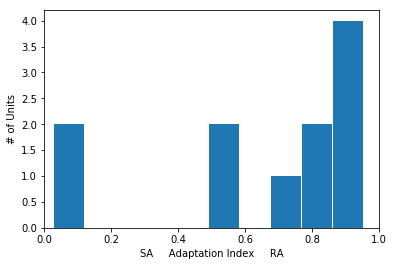

In [165]:
plt.hist(adaptationIndices[1:],bins=10,rwidth=.95)
plt.xlabel('SA     Adaptation Index     RA')
plt.ylabel('# of Units')
plt.xlim(0,1)

In [172]:
## Sorting units by overall firing rate.

spikeCount = []
oldorder = range(int(max(goodspikes)))

for unit in range(int(max(goodspikes))+1):
    spikeCount.append(len(goodspikes[goodspikes == unit]))
neworder = np.argsort(spikeCount)
print(spikeCount,'\n',sorted(spikeCount),neworder,'\n')
sorting = list(zip(oldorder, neworder))
print(sorting)
sortedGoodspikes = np.zeros(len(goodspikes))
for unit in sorting:
    sortedGoodspikes[goodspikes == unit[0]] = unit[1]

print(goodspikes,sortedGoodspikes)


[0, 1748, 219, 4130, 623, 611, 3911, 587, 7804, 909, 9888, 806] 
 [0, 219, 587, 611, 623, 806, 909, 1748, 3911, 4130, 7804, 9888] [ 0  2  7  5  4 11  9  1  6  3  8 10] 

[(0, 0), (1, 2), (2, 7), (3, 5), (4, 4), (5, 11), (6, 9), (7, 1), (8, 6), (9, 3), (10, 8)]
[ 10.  10.   3. ...,   8.   1.   8.] [ 8.  8.  5. ...,  6.  2.  6.]


In [ ]:
def make_event_raster(eventtimes, spiketimes, spikeclusters, window):
    # Use this to examine rasters of clusters centered on defined events
    if window/2 > min(eventtimes[1:] - eventtimes[:-1]):
        print('WARNING: window time longer than minimum event time')
    for cluster in np.unique(spikeclusters):
        clusterrasters = []
        eventnumber = []
        spikecounter = {}
        for i,t in enumerate(eventtimes):
            tempraster = []
            temptimes = []
            temptimes = spiketimes[(spiketimes>(t-window/2)) & (spiketimes<(t+window/2))] - t
            tempclusters = spikeclusters[(spiketimes>(t-window/2)) & (spiketimes<(t+window/2))]
            temprasters = temptimes[tempclusters == cluster]
            clusterrasters.append(temprasters)
            eventnumber.append(np.ones(len(temprasters))*i)
            bins = np.arange(-window/2,window/2,window/10)
            # making a binning function that allows for mean psth
        plt.figure(figsize = (3,5))
        plt.title('cluster '+str(cluster))
        for i, raster in enumerate(clusterrasters):
            plt.plot(raster,eventnumber[i],'|',color=[0.5, 0.5, 0.5],mew=.5)
            plt.ylim([-.5,len(eventtimes)+.5])
            plt.xlim([-window/2,window/2])
            plt.xlabel('Lag (s)')
            plt.ylabel('Event #')
            plt.axvline(0,.01,.99,linewidth = 0.5,color='k')
    

In [ ]:
psth_dict = make_psth(0.5,sample_rate,goodtimes,goodspikes)
psths = psth_dict['psths']
psth_binsize = psth_dict['bin_size']

In [ ]:
sample_rate = model.sample_rate
ltime = 5
rtime = 180
lsamples = ltime * sample_rate
rsamples = rtime * sample_rate

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(np.arange(ltime,rtime,psth_binsize),psths[int(ltime/psth_binsize):int(rtime/psth_binsize),3])
plt.ylabel('Hz')
plt.subplot(212)
plt.plot(cameratimes[(cameratimes > ltime) & (cameratimes < rtime)], diffline[(cameratimes > ltime) & (cameratimes < rtime)],color = [0.5, 0.5, 0.5],linewidth=.5)

In [504]:
def get_cluster_waveforms(pathToRawData=currPath+'/alldata/raw.mda',window=5,sampleRate=20000,
                          samples=goodsamples,spikes=goodspikes):
    """
    inputs:
    string path to mda file with raw data
    int time window in ms for waveform
    int sample rate in Hz
    
    output:
    dictionary with clusters as keys and waveforms as values
        waveforms organized in num_channels x time numpy array
    """
    avgWaveforms = {}
    windowInSamples = int(window * 0.001  * sampleRate)
    alldata = mdaio.readmda(pathToRawData)
    numChannels = alldata.shape[0]
    for unit in range(1,int(max(spikes)+1)):
        numSpikes = len(spikes[spikes == unit])
        avgWaveforms[unit] = np.zeros((numChannels,window*.001*sampleRate))
        for spike in samples[spikes==unit]:
            #print(avgWaveforms[unit].shape)
            if spike > windowInSamples/2 and spike < alldata.shape[1] - windowInSamples/2:
                avgWaveforms[unit] = avgWaveforms[unit] + alldata[:,int(spike-windowInSamples/2):int(spike+windowInSamples/2)]
        avgWaveforms[unit] /= numSpikes
        avgWaveforms[unit] -= np.transpose(np.matlib.repmat(np.mean(avgWaveforms[unit][:,:windowInSamples/2],axis=1),windowInSamples,1))

    del alldata # clear large array from memory
    return avgWaveforms

def plotClusterWaveforms(waveforms,probe='poly2',num_channels=32,save=False,save_path=None):
    x_scale = 5000
    y_scale = 0.1
    
    
    if probe == 'poly2':
        geometry = np.loadtxt('C:/Users/Alan/Documents/Github/clustering-pipelines/poly2Geom.csv',delimiter=',')
    else:
        geometry = np.transpose(np.matlib.repmat(np.arange(num_channels),2,1))
    for unit in waveforms.keys():
        fig = plt.figure(figsize=(2,4))
        for channel in range(num_channels):
            x_offset = geometry[channel,1]
            y_offset = geometry[channel,0]
            plt.plot(np.arange(-window*x_scale/2,window*x_scale/2,1/sampleRate*x_scale)+x_offset,avgWaveforms[unit][channel,:]*y_scale+y_offset,color='k')
        if (save):
            if (save_path):
                filename = "%s/waveform_%02d.png" % (save_path,unit)
            else:
                filename = "waveform_%02d.png" % (unit)
            fig.savefig (filename,dpi=300)
    del geometry

In [505]:
waveforms = get_cluster_waveforms()

C:\Users\Alan\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Alan\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


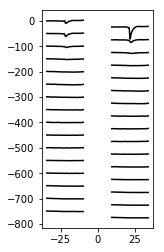

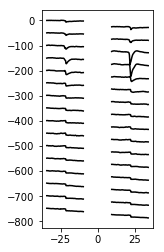

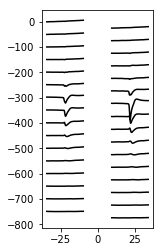

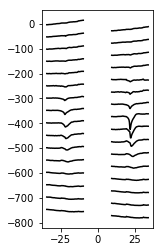

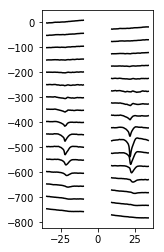

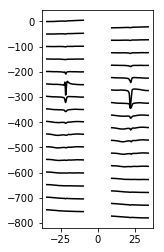

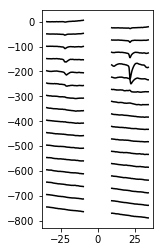

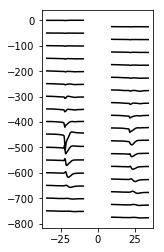

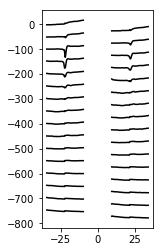

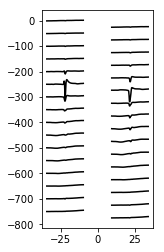

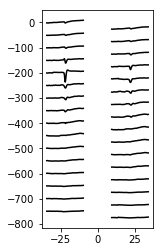

In [507]:
plotClusterWaveforms(waveforms,save=True)

In [483]:
del alldata

In [ ]:
def get_cluster_waveforms (kwik_model,cluster_id):
    try:
        if (not(type(kwik_model) is KwikModel)):
            raise ValueError       
    except ValueError:
            print ("Exception: the first argument should be a KwikModel object")
            return
        
    clusters = kwik_model.spike_clusters
    try:
        if ((not(cluster_id in clusters))):
            raise ValueError       
    except ValueError:
            print ("Exception: cluster_id (%d) not found !! " % cluster_id)
            return
    
    idx=np.argwhere (clusters==cluster_id)
    w=model.all_waveforms[idx]
    return w

def plot_cluster_waveforms (kwik_model,cluster_id,nspikes, save=False,save_path=None):
    
    w = get_cluster_waveforms (kwik_model,cluster_id)
    y_off = max(model.channel_positions[:,1])
    y_scale = 1
    x_scale = 1
    num_channels = w.shape[2]
    waveform_size = w.shape[1]
    np.random.seed()
    
    fig=plt.figure(num=None, figsize=(2, 4), facecolor='w', edgecolor='k')
    plt.clf()
    spike_id = np.arange(w.shape[0])
    np.random.shuffle(spike_id)
    spike_id = spike_id[0:nspikes]
    for ch in range (0,num_channels):
        x_offset = model.channel_positions [ch,0]
        y_offset = model.channel_positions [ch,1]*y_scale-y_off
        mu_spikes = np.mean(w[:,:,ch],0)
        for i in spike_id:
            spike = w[i,:,ch]
            x=x_scale*x_offset+range(int(-waveform_size/2),int(waveform_size/2))
            #plt.plot (x,0.05*spike+y_offset,color="gray",alpha=0.5)
        plt.plot (x,0.3*mu_spikes+y_offset,"-",color="black",linewidth=1,alpha=0.5)
    plt.ylabel('microns')
    plt.xlabel('microns')
    plt.tight_layout()
    plt.show()
    if (save):
        if (save_path):
            filename = "%s/waveform_%02d.png" % (save_path,cluster_id)
        else:
            filename = "waveform_%02d.png" % cluster_id
        fig.savefig (filename,dpi=300)

In [ ]:
for i, cluster in enumerate(good):
    print(cluster,'=', i,':')
    plot_cluster_waveforms(model,cluster,1000,save=False)